In [17]:
# 초기시간 끝시간, cv움직임

In [18]:
from geopy.distance import geodesic
import numpy as np
import matplotlib.pyplot as plt

# 불법드론 초기 데이터 (예시)
init_latitude = 36.642922
init_longitude = 126.324793

# 착륙 지점 - 이제 0,0으로 설정
landing_latitude = 36.660728
landing_longitude = 126.341537

# 반경 (미터)
radius = 3000

# 불법 드론 초기 속도
init_drone_speed = 10  # m/s

# 불법드론 최대 속도
max_drone_speed = 20  # m/s

# 위도와 경도에서 XY 좌표로 변환하는 함수 (착륙 지점을 0,0으로 설정)
def latlon_to_xy(lat, lon, base_lat, base_lon):
    north_dist = geodesic((base_lat, base_lon), (lat, base_lon)).meters
    west_dist = geodesic((base_lat, base_lon), (base_lat, lon)).meters

    x = north_dist if lat > base_lat else -north_dist
    y = west_dist if lon < base_lon else west_dist

    return x, y

# 초기 위치의 XY 좌표
init_x, init_y = latlon_to_xy(init_latitude, init_longitude, landing_latitude, landing_longitude)

def generate_drone_path_xy(init_x, init_y, start_time, total_time, init_speed, radius):
    path = [(start_time, init_x, init_y)]  # 시작 시간 0으로 설정
    current_x, current_y = init_x, init_y

    for time_step in range(1, total_time + 1):  # 시간 스텝을 1부터 시작
        # 착륙 지점(0,0)을 향해 등속 직선 운동
        direction_to_landing = np.arctan2(-current_y, -current_x)
        dx = np.cos(direction_to_landing) * init_speed
        dy = np.sin(direction_to_landing) * init_speed
        
        current_x += dx
        current_y += dy

        # 비행 가능 지역 내에 있는지 확인
        if np.sqrt(current_x**2 + current_y**2) > radius:
            break

        # 착륙 지점에 도달했는지 확인
        if np.isclose(current_x, 0, atol=1) and np.isclose(current_y, 0, atol=1): # 도달 허용 범위
            path.append((time_step, current_x, current_y))
            break

        path.append((time_step, current_x, current_y))

    # start_time 이후의 경로만 반환
    return [p for p in path if p[0] >= start_time]




# 경로 생성 (10분 = 600초)
drone_path_xy = generate_drone_path_xy(init_x, init_y, 0, 600, init_drone_speed, radius)
drone_path_xy_np = np.array(drone_path_xy)

print(drone_path_xy_np.shape)

(249, 3)


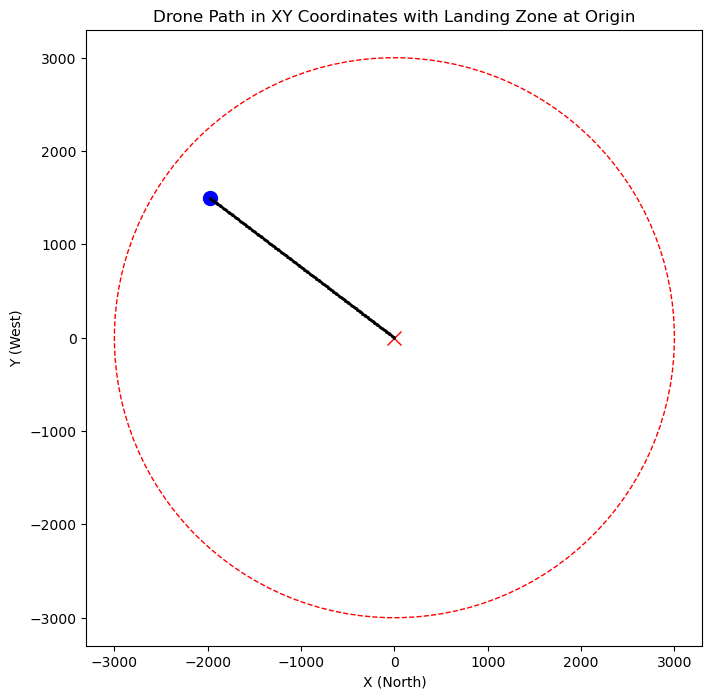

In [19]:
# 플롯 생성
plt.figure(figsize=(10, 8))
plt.plot(init_x, init_y, 'bo', markersize=10)  # 초기 위치
plt.plot(0, 0, 'rx', markersize=10)  # 착륙 위치 (0,0)
plt.plot(drone_path_xy_np[:,1], drone_path_xy_np[:,2], 'ko', markersize=1)

# 반경 그리기
circle = plt.Circle((0, 0), radius, color='red', fill=False, linestyle='--')
plt.gca().add_patch(circle)

# 플롯 설정
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('X (North)')
plt.ylabel('Y (West)')
plt.title('Drone Path in XY Coordinates with Landing Zone at Origin')
plt.show()